In [1]:
import numpy as np
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from treemind import Explainer
from treemind.plot import (
    bar_plot,
    range_plot,
    feature_plot,
    interaction_plot,
)

In [2]:
# Create LightGBM datasets

X_train, y_train = load_breast_cancer(return_X_y=True, as_frame=True)

train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters for LightGBM
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "bagging_freq":1,
    "bagging_fraction":0.6,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "max_depth": 4,
    "feature_fraction": 0.9,
    "verbose": -1,
}

# Train the model
num_round = 100
model = lgb.train(params, train_data, num_boost_round=num_round)

In [3]:
explainer = Explainer()
explainer(model)

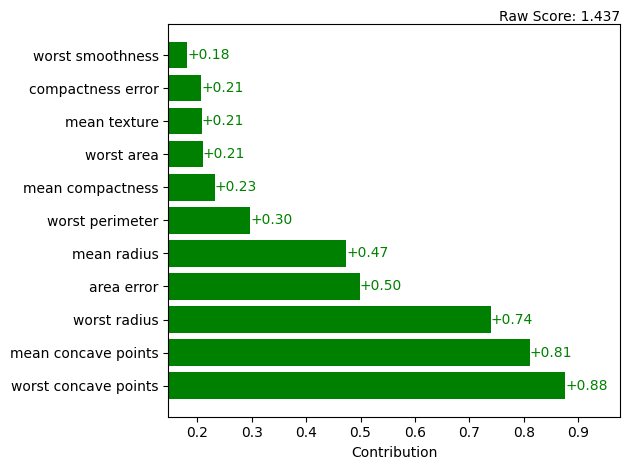

In [4]:
values, raw_score = explainer.analyze_data(X_train, detailed=False)
bar_plot(values, raw_score, columns=X_train.columns, max_col=11)

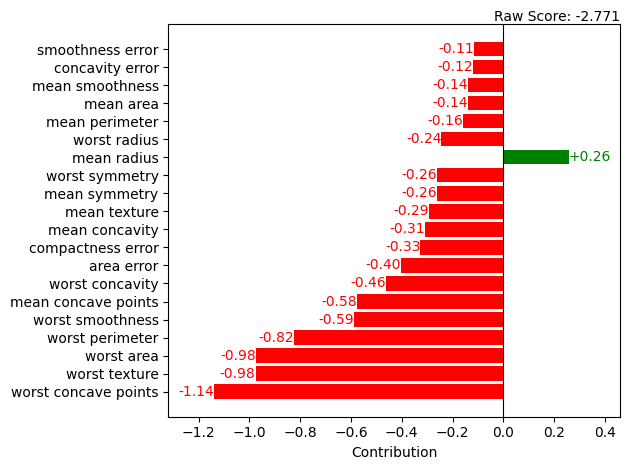

In [5]:
values, raw_score = explainer.analyze_data(X_train.iloc[[5],:], detailed=False)
bar_plot(values, raw_score, columns=X_train.columns)

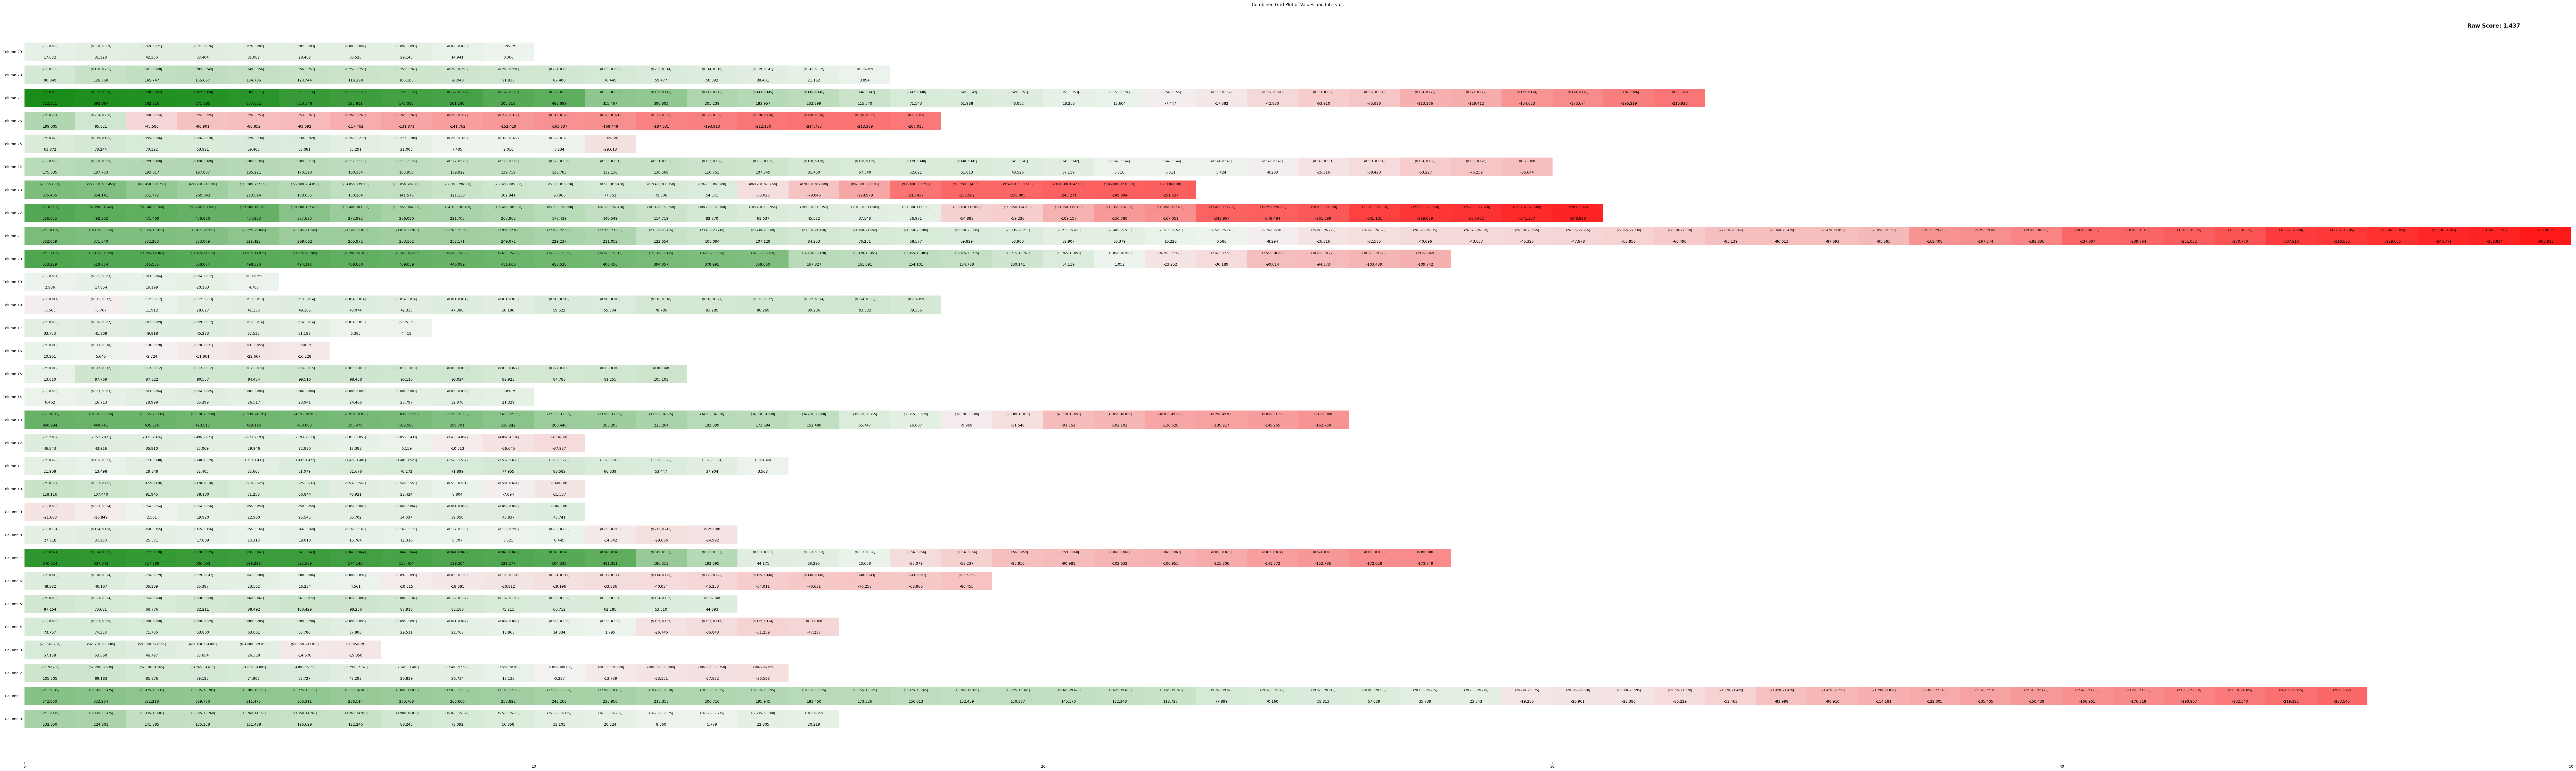

In [6]:
values, points, raw_score = explainer.analyze_data(X_train, detailed=True)

range_plot(values, raw_score, points)

In [8]:
explainer.count_node(interaction = False).head()

,column_index,count
0,21,313
1,27,296
2,22,270
3,7,220
4,1,220


In [9]:
feature_df = explainer.analyze_feature(22)
feature_df.head()

,worst_perimeter_lb,worst_perimeter_ub,mean,min,max
0,-inf,87.19,0.877947,-0.688576,2.119448
1,87.19,91.54,0.640371,-1.064928,2.010675
2,91.54,99.26,0.546345,-1.270292,2.021609
3,99.26,101.50,0.547398,-1.270292,2.024768
4,101.50,101.80,0.490821,-1.326869,1.968191


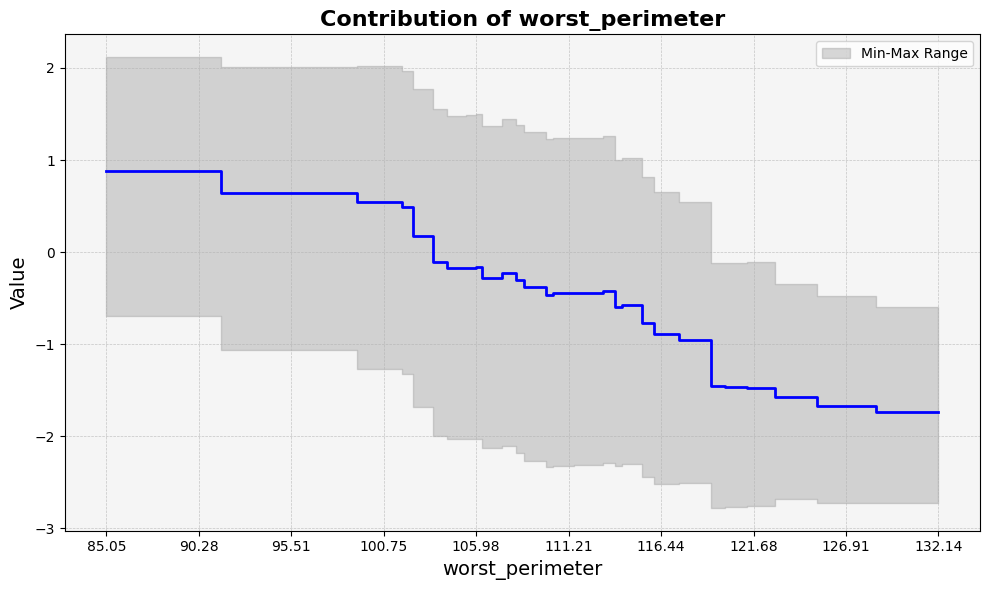

In [10]:
feature_plot(feature_df)

In [11]:
explainer.count_node(interaction = True).head()

,column1_index,column2_index,count
0,21,22,90
1,1,27,90
2,7,21,90
3,23,27,85
4,22,27,79


In [12]:
df = explainer.analyze_interaction(22, 27)
df.head()

,worst_perimeter_lb,worst_perimeter_ub,worst_concave_points_lb,worst_concave_points_ub,value
0,-inf,91.54,-inf,0.09312,0.727198
1,91.54,99.26,-inf,0.09312,0.676209
2,99.26,101.50,-inf,0.09312,0.677788
3,101.50,101.80,-inf,0.09312,0.621211
4,101.80,102.40,-inf,0.09312,0.580242


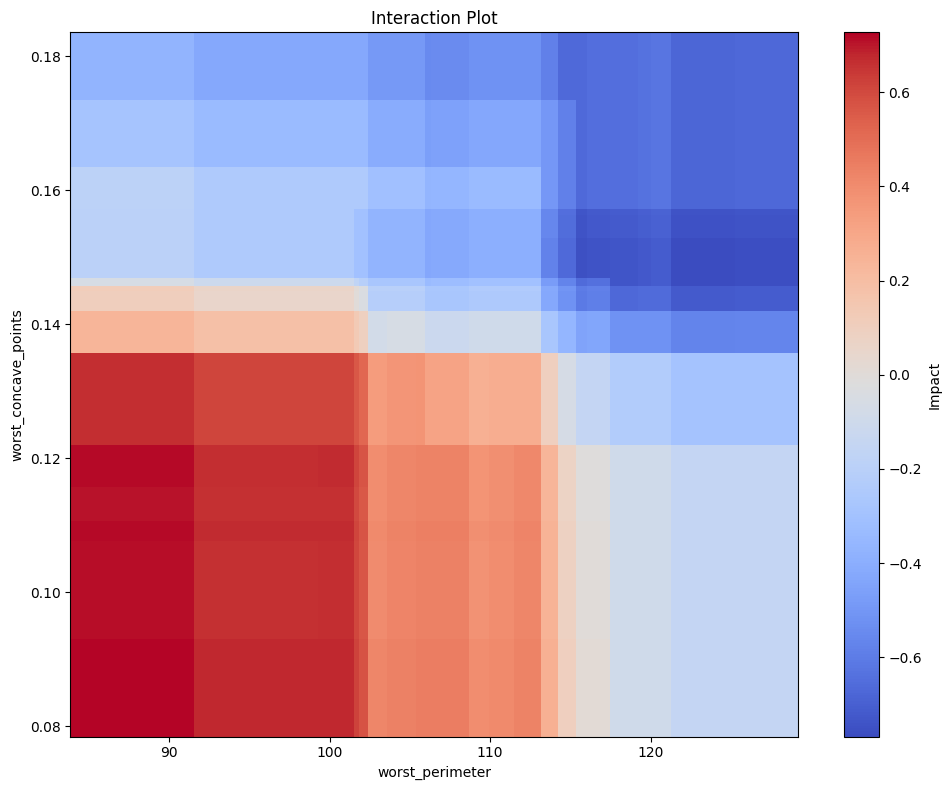

In [13]:
interaction_plot(df)